In [ ]:
import gdown
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Część 1

In [ ]:
gdown.download("https://drive.google.com/uc?id=1cT_Os-2v6yLMNAJc3ESboPx7FmKBMLM5")
df = pd.read_csv("earnings.csv", sep=";")

Downloading...
From: https://drive.google.com/uc?id=1cT_Os-2v6yLMNAJc3ESboPx7FmKBMLM5
To: /content/earnings.csv
100%|██████████| 668k/668k [00:00<00:00, 91.7MB/s]


In [ ]:
df

,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
0,192064,26651.53,0.00,0.00,0.00,1,3,2,4,1,49,33.03,7.06,1524.15,0.0
1,25495,40168.50,1500.00,0.00,3414.32,1,2,1,1,1,36,10.07,6.01,1562.40,0.0
2,142164,20134.80,0.00,0.00,1700.41,1,2,2,4,1,52,28.08,19.05,1816.00,0.0
3,198034,16475.00,0.00,0.00,1305.00,1,2,2,5,1,55,35.07,11.01,1816.00,0.0
4,144990,34797.60,0.00,1893.35,3118.73,1,2,2,2,1,50,27.00,19.01,722.80,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,41597,36573.22,1323.65,1276.80,3337.32,1,2,2,2,1,50,27.02,27.02,766.80,40.0
10996,120022,28280.00,5470.00,0.00,2385.13,1,1,2,4,1,41,18.08,15.09,1792.00,0.0
10997,41800,109316.96,0.00,0.00,9042.58,1,1,2,2,1,47,20.02,1.07,1656.00,0.0
10998,153849,57721.35,6950.00,0.00,4906.32,1,1,2,2,1,47,28.01,21.10,1784.00,0.0


In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

missing_data = missing_data[missing_data > 0]
if missing_data.empty:
    print("Brakujących danych nie stwierdzono.")

id                   0
base                 0
bonus                0
overtime_pay         0
other                0
sector               0
section_07           0
sex                  0
education            0
contract             0
age                  0
duration_total       0
duration_entity      0
duration_nominal     0
duration_overtime    0
dtype: int64
Brakujących danych nie stwierdzono.


1.1 Ile obserwacji znajduje się w próbce? Opisz strukturę zbioru danych:
Ile zmiennych ilościowych, a ile jakościowych zawiera zbiór? Czy występują dane brakujące?

Odp.: W próbce znajduje się 11000 rekordów.

Zmiennych ilościowych jest 9: (base – wynagrodzenie zasadnicze

- base - płaca bazowa

- bonus – premie

- overtime pay – płatności za nadgodziny

- other – inne wynagrodzenia

- age – wiek

- duration total – całkowity staż pracy

- duration entity – staż w obecnym miejscu pracy

- duration nominal – nominalny czas pracy

- duration overtime – czas pracy w nadgodzinach

a jakościowych jest 6 (bez id to 5):

- id – identyfikator (technicznie numeryczny, ale nie służy do analizy, więc traktujemy jako pomocniczy)

- sector – sektor gospodarki (1 – publiczny, 2 – prywatny)

- section 07 – sekcja działalności wg NACE (1 – Administracja publiczna i obrona narodowa; obowiązkowe ubezpieczenia społeczne, 2 – Edukacja, 3 – Opieka zdrowotna i pomoc społeczna)

- sex – płeć (1 – mężczyzna, 2 – kobieta)

- education – poziom wykształcenia (1 – doktorat, 2 – wyższe, 3 – policealne, 4 – średnie, 5 – zasadnicze zawodowe, 6 – gimnazjalne i niższe)

- contract – typ umowy (1 – na czas nieokreślony, 2 – na czas określony)

spośród wszystkich 15 (14 bez id) cech w danym rekordzie. W zbiorze danych nie występują dane brakujące.

In [ ]:
# wyrzucam id, bo jest zupełnie niepotrzebne
df.drop(columns=["id"], inplace=True)
df_backup = df.copy()

In [ ]:
df

,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
0,26651.53,0.00,0.00,0.00,1,3,2,4,1,49,33.03,7.06,1524.15,0.0
1,40168.50,1500.00,0.00,3414.32,1,2,1,1,1,36,10.07,6.01,1562.40,0.0
2,20134.80,0.00,0.00,1700.41,1,2,2,4,1,52,28.08,19.05,1816.00,0.0
3,16475.00,0.00,0.00,1305.00,1,2,2,5,1,55,35.07,11.01,1816.00,0.0
4,34797.60,0.00,1893.35,3118.73,1,2,2,2,1,50,27.00,19.01,722.80,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,36573.22,1323.65,1276.80,3337.32,1,2,2,2,1,50,27.02,27.02,766.80,40.0
10996,28280.00,5470.00,0.00,2385.13,1,1,2,4,1,41,18.08,15.09,1792.00,0.0
10997,109316.96,0.00,0.00,9042.58,1,1,2,2,1,47,20.02,1.07,1656.00,0.0
10998,57721.35,6950.00,0.00,4906.32,1,1,2,2,1,47,28.01,21.10,1784.00,0.0


1.2  Podaj i opisz odpowiednie tabele częstości lub statystyki opisowe dla zmiennych. (uwzględnij typ zmiennych!)

In [ ]:
print(df.columns.tolist())

['base', 'bonus', 'overtime_pay', 'other', 'sector', 'section_07', 'sex', 'education', 'contract', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']


In [ ]:
# Podział zmiennych na ilościowe i jakościowe
quantity_columns = ['base', 'bonus', 'overtime_pay', 'other',
                    'age', 'duration_total', 'duration_entity',
                    'duration_nominal', 'duration_overtime']

qualiti_columns = ['sector', 'section_07', 'sex', 'education', 'contract']

# Statystyki opisowe dla zmiennych ilościowych
print("Statystyki opisowe dla zmiennych ilościowych:\n")
print(df[quantity_columns].describe())

# Tabele częstości dla zmiennych jakościowych
print("\nTabele częstości dla zmiennych jakościowych:\n")
for col in qualiti_columns:
    print(f"\n==========================")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))


Statystyki opisowe dla zmiennych ilościowych:

                base          bonus   overtime_pay         other  \
count   11000.000000   11000.000000   11000.000000  11000.000000   
mean    33376.738065    2128.486176    1679.273923   2477.625815   
std     19276.551638    4966.444726    5407.964344   3715.419120   
min        10.000000       0.000000       0.000000      0.000000   
25%     20995.115000       0.000000       0.000000      0.000000   
50%     31341.245000     620.000000       0.000000   2141.820000   
75%     41348.290000    2940.717500    1139.330000   3497.430000   
max    241624.390000  258061.000000  228110.340000  88555.760000   

                age  duration_total  duration_entity  duration_nominal  \
count  11000.000000     11000.00000     11000.000000      11000.000000   
mean      42.470182        18.56708        11.401382       1301.307435   
std       10.012140        10.99695         9.322181        540.189234   
min       19.000000         0.01000         

1.3. Przedstaw i omów (tam, gdzie to zasadne) rozkłady zmiennych, np. porównaj je z rozkładem normalnym lub innym, tworząc histogramy i rysując je razem z funkcją gęstości.

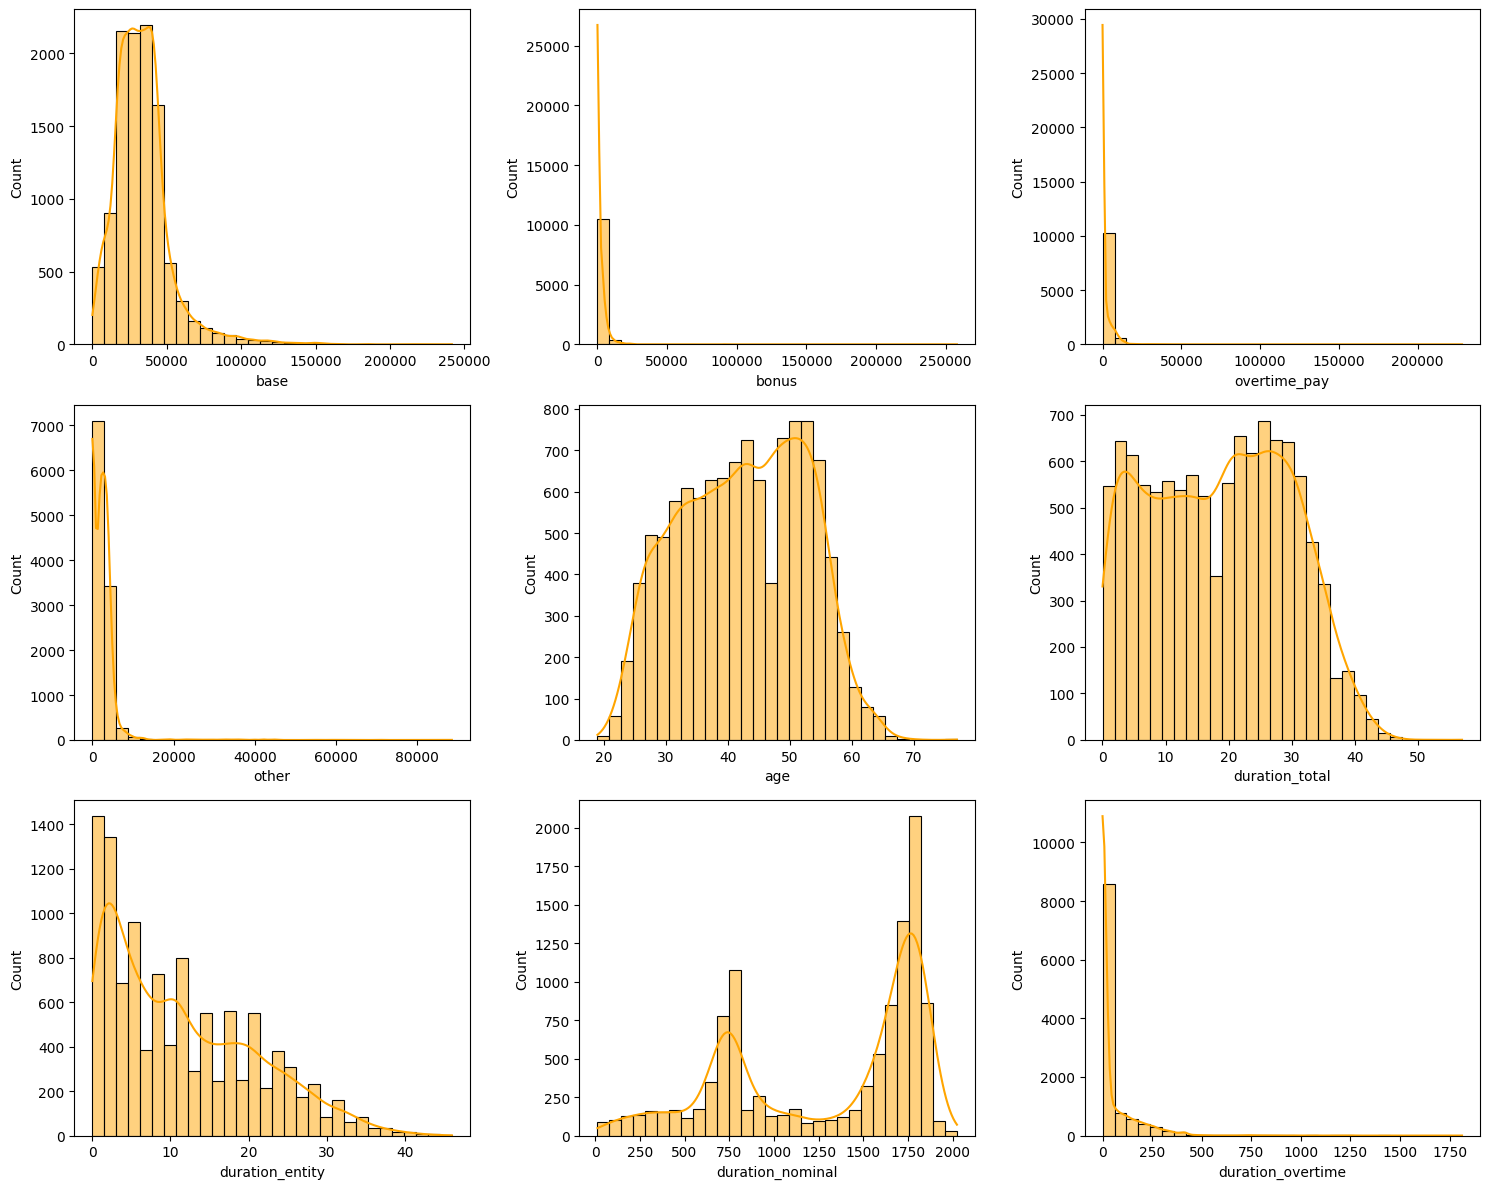

In [ ]:
# Tworzymy wykresy dla każdej zmiennej ilościowej
plt.figure(figsize=(15, 12))
for i, col in enumerate(quantity_columns, 1):
    plt.subplot(3, 3, i)

    # Histogram + KDE
    sns.histplot(df[col], kde=True, bins=30, color="orange", linewidth=0.8)
plt.tight_layout()
plt.show()

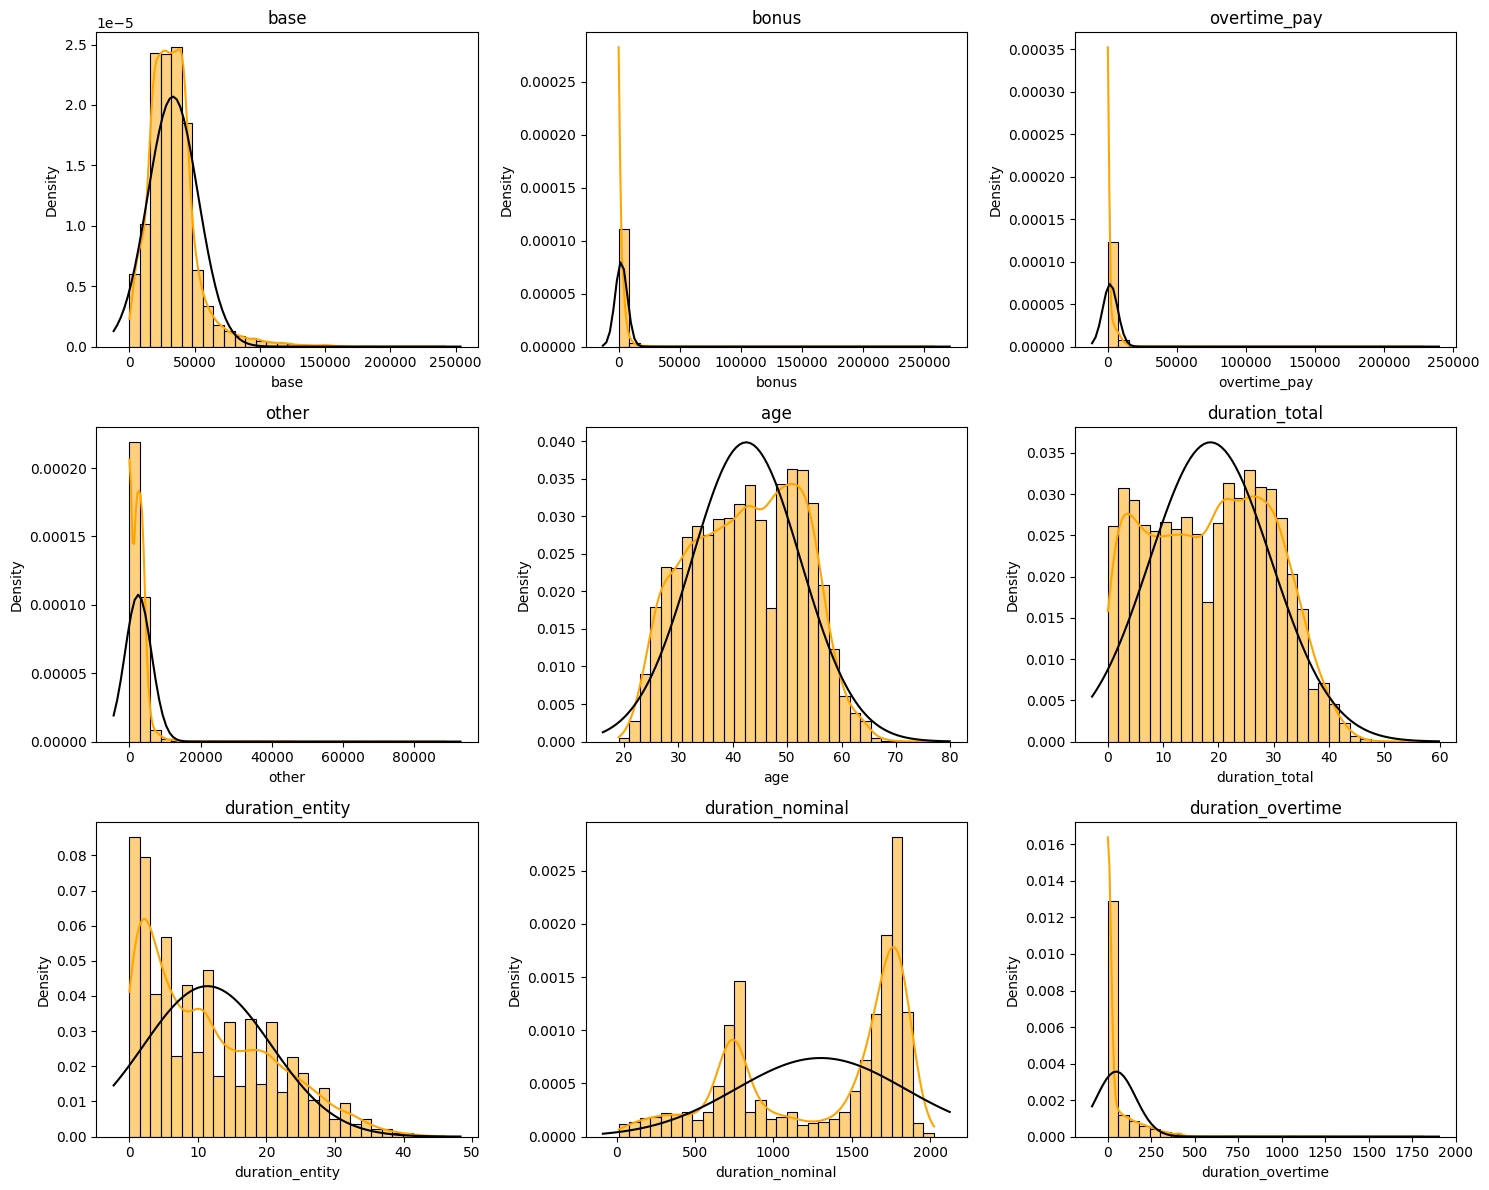

In [ ]:
# Rysuję jeszcze raz to samo, ale w postaci rozkładu gęstości i nakladam jeszcze na to teoretyczną krzywą dzwonową
plt.figure(figsize=(15, 12))
for i, col in enumerate(quantity_columns, 1):
    plt.subplot(3, 3, i)

    # Histogram (gęstości) + KDE
    sns.histplot(df[col], kde=True, bins=30, color="orange", linewidth=0.8, stat="density")

    # Nałożenie teoretycznego dopasowanego rozkładu normalnego
    mu, std = stats.norm.fit(df[col])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=1.5)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

Z powyższych histogramów możemy wysnuć pewne wnioski. Zmienne bonus, overtime_pay oraz other są silnie prawoskośne — większość wartości jest niska (równa 0), a mniejszość obserwacji osiągają wyższe wartości. Zmienna age ma rozkład zbliżony do symetrycznego, ale nie jest idealnie normalny. Duration_total wykazuje rozkład lekko prawoskośny z większą koncentracją wartości w niższych zakresach. Duration_entity jest również prawoskośny, co jest skutkiem tego, że pracownicy osiągają pewien staż poczynając od 0 do czasu stażu w którym pracują. W przypadku duration_nominal widać nietypową strukturę — rozkład jest bimodalny, co może wskazywać na istnienie dwóch różnych grup w danych. Duration_overtime jest silnie prawoskośny z dominującą liczbą wartości bliskich lub równych zeru. Krzywe normalnego rozkładu (czarne linie) nałożone na histogramy nie są idealnie dopasowane, co potwierdza odchylenie zmiennych od rozkładu normalnego.

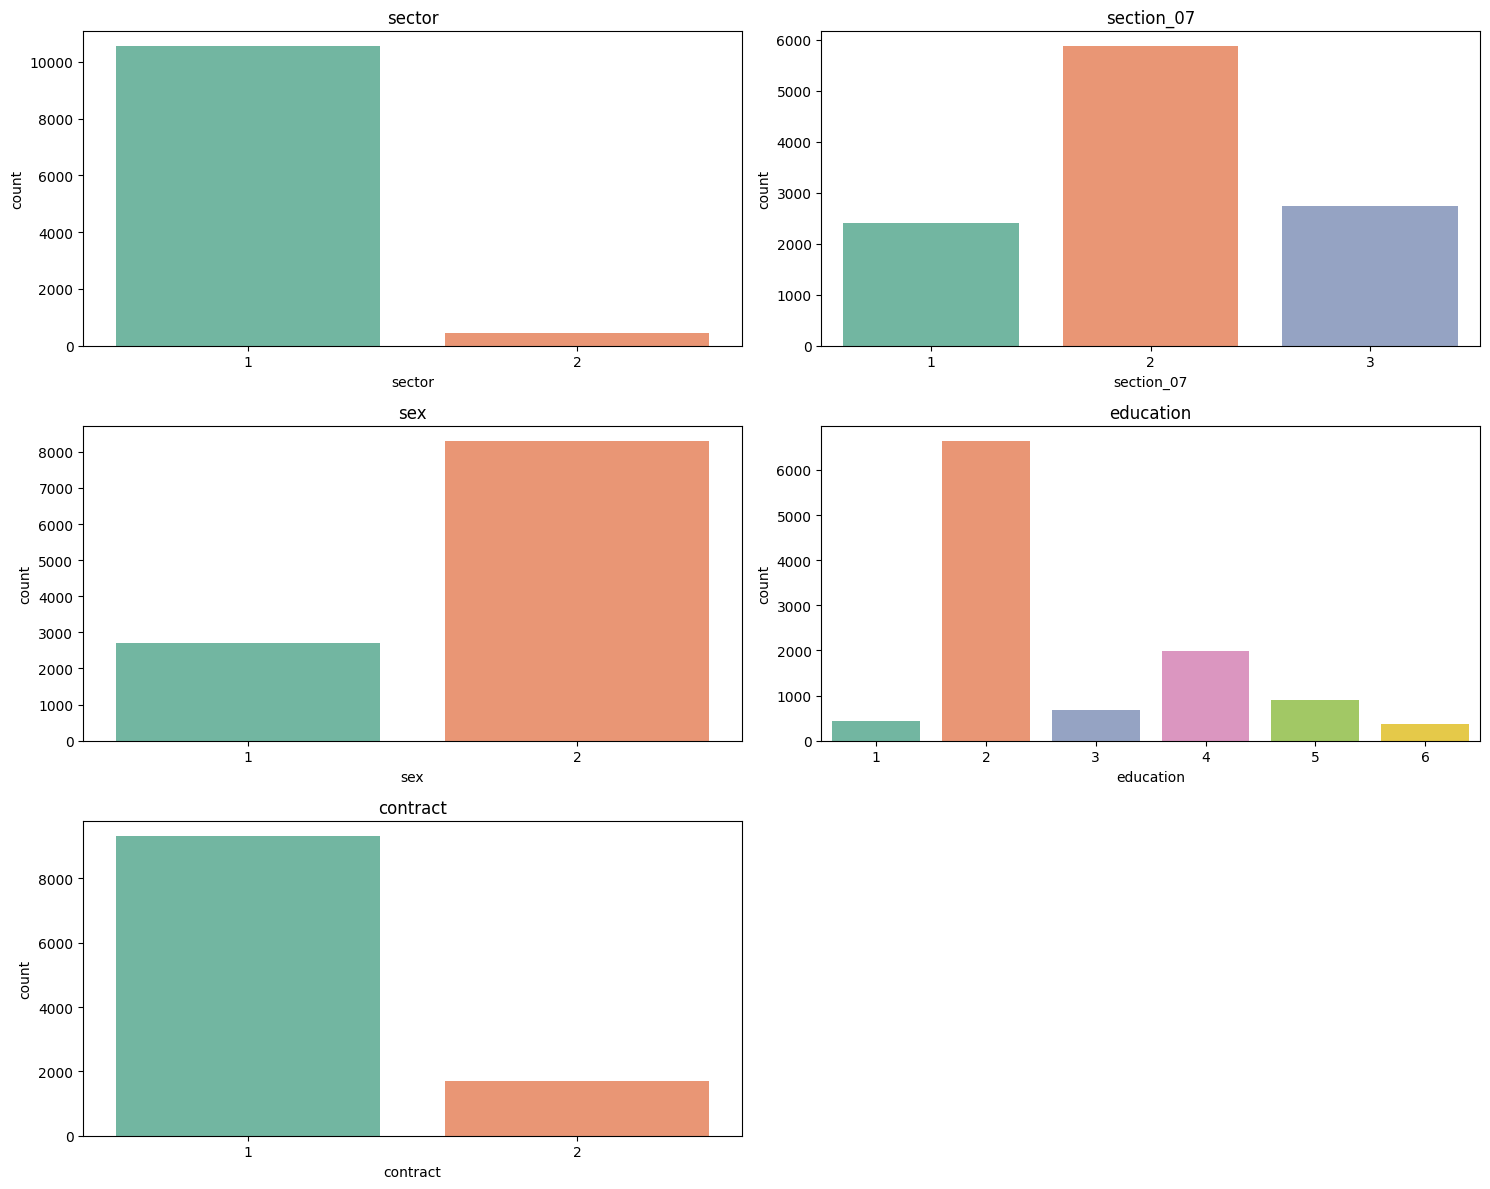

In [ ]:
plt.figure(figsize=(15, 12))

# Tworzymy wykresy dla każdej zmiennej jakościowej
for i, col in enumerate(qualiti_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

- sector: Zdecydowana większość pracowników pracuje w sektorze publicznym (kategoria 1), a tylko niewielki procent w sektorze prywatnym (kategoria 2).

- section_07: Najwięcej badanych pracowników jest zatrudnionych w sektorze „Edukacja” (kategoria 2), następnie w „Opiece zdrowotnej i działalności społecznej” (kategoria 3), a najmniej w „Administracji publicznej i obronie narodowej” (kategoria 1).

- sex: Kobiety (kategoria 2) stanowią większą część badanej populacji w porównaniu do mężczyzn (kategoria 1).

- education: Najczęściej spotykanym poziomem wykształcenia jest wykształcenie wyższe (kategoria 2), następnie średnie (kategoria 4). Pozostałe poziomy wykształcenia są mniej liczne.

- contract: Przeważająca większość pracowników ma umowę na czas nieokreślony (kategoria 1), podczas gdy znacząco mniej osób zatrudnionych jest na czas określony (kategoria 2).

## Część 2

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Podział zmiennych
numerical = ['base', 'bonus', 'overtime_pay', 'other', 'age',
             'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
categorical = ['sector', 'section_07', 'sex', 'education', 'contract']

# Tworzymy ColumnTransformer (skalowanie + kodowanie)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# Tworzymy pełny pipeline z KMeans (ilość klastrów dobierzemy później)
pipeline = Pipeline([
    ('prep', preprocessor),
    ('cluster', KMeans(n_clusters=3, random_state=42))  # tymczasowo n=3
])

pipeline.fit(df)
X_processed = preprocessor.fit_transform(df) # Transformacja danych

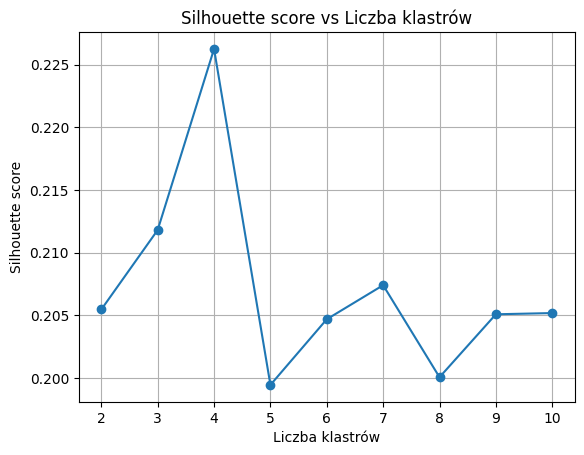

Najlepszy podział to 4 klastry (Silhouette Score: 0.226)


In [ ]:
silhouette_scores = []
range_n = range(2, 11)

for n in range_n:
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    silhouette_scores.append(score)

# Wykres silhouette_score'ów
plt.plot(range_n, silhouette_scores, marker='o')
plt.title('Silhouette score vs Liczba klastrów')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

# Najlepszy score i liczba klastrów
best_n = range_n[np.argmax(silhouette_scores)]
print(f"Najlepszy podział to {best_n} klastry (Silhouette Score: {max(silhouette_scores):.3f})")

Do klasteryzacji zastosowano algorytm KMeans. Jako zmienne wejściowe wykorzystano zarówno zmienne ilościowe, jak i zakodowane zmienne jakościowe (OneHotEncoder). Wszystkie dane zostały uprzednio przeskalowane za pomocą StandardScaler, aby każda zmienna miała taki sam wpływ na wyznaczanie odległości między punktami. Optymalną liczbę klastrów wybrano na podstawie miary oceniającej spójność i rozdzielność grup, niezależnie od liczby obserwacji.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

# Dopasowanie KMeans z najlepszą liczbą klastrów
best_kmeans = KMeans(n_clusters=best_n, random_state=42)
cluster_labels = best_kmeans.fit_predict(X_processed)

# Dodanie etykiet klastra do df (bez kolumny 'id')
df_clusters = df.copy()
df_clusters['cluster'] = cluster_labels

# Grupowanie po klastrze i obliczanie średnich, mediany, odchyleń standardowych
cluster_summary = df_clusters.groupby('cluster').agg({
    'base': ['mean', 'median', 'std'],
    'bonus': ['mean', 'median', 'std'],
    'overtime_pay': ['mean', 'median'],
    'other': ['mean', 'median', 'std'],
    'sector': ['mean', 'median', 'std'],
    'section_07': ['mean', 'median', 'std'],
    'sex': ['mean', 'median', 'std'],
    'education': ['mean', 'median', 'std'],
    'contract': ['mean', 'median', 'std'],
    'age': ['mean', 'median', 'std'],
    'duration_total': ['mean', 'median', 'std'],
    'duration_entity': ['mean', 'median', 'std'],
    'duration_nominal': ['mean', 'median', 'std'],
    'duration_overtime': ['mean', 'median', 'std']
})

# Zmieniamy nazwy kolumn, by były bardziej zrozumiałe
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

pd.set_option('display.max_columns', None)
print(cluster_summary)
pd.reset_option('display.max_columns')

            base_mean  base_median      base_std   bonus_mean  bonus_median  \
cluster                                                                       
0        37929.086600     34452.67  21850.888537  2918.611857      1268.495   
1        25544.070174     25228.00  13996.719810  1573.277186       306.000   
2        44691.946883     30552.00  40354.320529  1995.106494         0.000   
3        41611.288853     41005.14  11699.028069  1051.417932        10.050   

           bonus_std  overtime_pay_mean  overtime_pay_median    other_mean  \
cluster                                                                      
0        6663.365071         367.835220                 0.00   2309.970762   
1        2704.264596         566.737464                 0.00   1669.892127   
2        4636.860435        3999.736753                 0.00  37151.664675   
3        2169.589304        9984.746488              7714.17   3789.323897   

         other_median     other_std  sector_mean  sector

### Wnioski z klasteryzacji:

- Klaster 0: Starsi pracownicy, średnie zarobki. Średnie Wykształcenie. Dominują osoby z sektora publicznego. Niskie wynagrodzenie za nadgodziny, z długim stażem pracy.

- Klaster 1: Młodsze osoby z niższymi zarobkami, niskie bonusy i nadgodziny. Częściej zatrudnieni na umowę na czas określony, wyższe wykształcenie, krótszy staż w firmie.

- Klaster 2: Pracownicy z wyższymi zarobkami, wyższe wykształcenie dominuje, dużo nadgodzin i bonusów. Przeważnie pracownicy sektora "Human Health and Social Work Activities", Średni staż w firmie, częściej w sektorze prywatnym.

- Klaster 3: Wysokie zarobki, długie godziny pracy, niski bonus, wyższe wykształcenie. Stabilni pracownicy, zatrudnieni głównie umowy na czas nieokreślony, sektor publiczny.

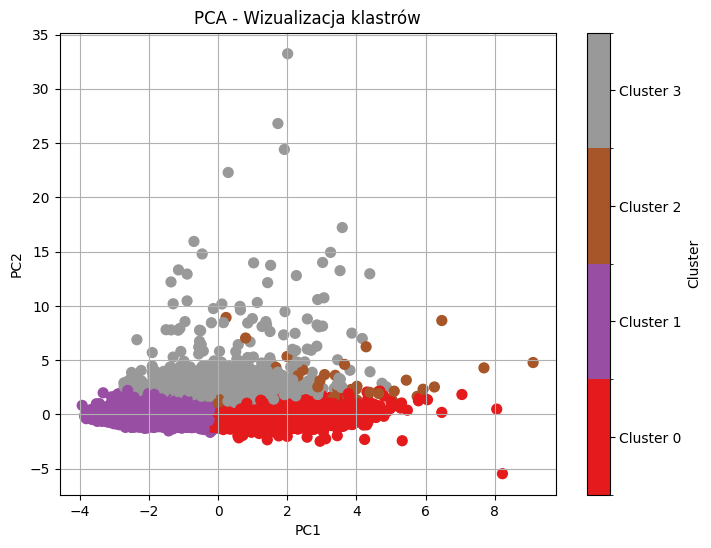

In [ ]:
# Dodatek
# Redukcja wymiarowości do 2D za pomocą PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)
unique_clusters = np.unique(cluster_labels)
n_clusters = len(unique_clusters)

# Tworzymy odpowiednią colormapę
base_cmap = plt.get_cmap('Set1')
colors = base_cmap(np.linspace(0, 1, n_clusters))
cmap = ListedColormap(colors)
norm = BoundaryNorm(boundaries=np.arange(-0.5, n_clusters + 0.5, 1), ncolors=n_clusters)

# Wizualizacja
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=cmap, norm=norm, s=50)
plt.title('PCA - Wizualizacja klastrów')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Tworzymy colorbar z podpisami Cluster 0, Cluster 1, itd.
cbar = plt.colorbar(sc, ticks=unique_clusters)
cbar.ax.set_yticklabels([f'Cluster {i}' for i in unique_clusters])
cbar.set_label('Cluster')

plt.grid(True)
plt.show()


## Część 3

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 3.1. Przygotowanie danych:
# Tworzymy nową zmienną, która oznacza, czy pracownik ma wykształcenie wyższe (education <= 2)
df['higher_education'] = df['education'].apply(lambda x: 1 if x <= 2 else 0)

# Zdefiniujmy zmienne wejściowe (wszystkie kolumny oprócz 'higher_education')
X = df.drop(columns=['higher_education', 'education'])

# Zmienna docelowa (target)
y = df['higher_education']

print(X)
print(y)

            base    bonus  overtime_pay    other  sector  section_07  sex  \
0       26651.53     0.00          0.00     0.00       1           3    2   
1       40168.50  1500.00          0.00  3414.32       1           2    1   
2       20134.80     0.00          0.00  1700.41       1           2    2   
3       16475.00     0.00          0.00  1305.00       1           2    2   
4       34797.60     0.00       1893.35  3118.73       1           2    2   
...          ...      ...           ...      ...     ...         ...  ...   
10995   36573.22  1323.65       1276.80  3337.32       1           2    2   
10996   28280.00  5470.00          0.00  2385.13       1           1    2   
10997  109316.96     0.00          0.00  9042.58       1           1    2   
10998   57721.35  6950.00          0.00  4906.32       1           1    2   
10999   37676.52   700.00        730.31  3296.65       1           2    2   

       contract  age  duration_total  duration_entity  duration_nominal  \


In [ ]:
# 3.2. Tworzymy preprocesor:
# OneHotEncoder dla zmiennych kategorycznych i StandardScaler dla zmiennych numerycznych
categorical_columns = ['sector', 'section_07', 'sex', 'contract']  # Wybór zmiennych kategorycznych
numerical_columns = ['base', 'bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']  # Wybór zmiennych ilościowych

# Tworzymy preprocesor, który stosuje odpowiednie transformacje do zmiennych kategorycznych i numerycznych
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Kodowanie zmiennych kategorycznych
        ('num', StandardScaler(), numerical_columns)  # Skalowanie zmiennych numerycznych
    ])

In [ ]:
!pip install optuna
!pip install optuna-integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 2.5 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.integration import OptunaSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


# 3.3 Budowanie modelu:
# Tworzymy pipeline, który najpierw przetworzy dane, a potem dopasuje model

# próba dla algorytmu drzew losowych
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Przetwarzanie zmiennych
#     ('classifier', RandomForestClassifier())  # Model klasyfikacyjny
# ])

# Pipeline z XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss'))
])

# Przestrzeń parametrów (ciągłe i dyskretne)
param_distributions = {
    'classifier__n_estimators': optuna.distributions.IntDistribution(50, 200),
    'classifier__max_depth': optuna.distributions.IntDistribution(3, 10),
    'classifier__learning_rate': optuna.distributions.FloatDistribution(0.01, 0.3, log=True),
    'classifier__subsample': optuna.distributions.FloatDistribution(0.6, 1.0),
    'classifier__colsample_bytree': optuna.distributions.FloatDistribution(0.6, 1.0)
}

# OptunaSearchCV z 5-krotną walidacją
optuna_search = OptunaSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_trials=50,
    timeout=None,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Dopasowanie do danych
optuna_search.fit(X, y)

# Najlepsze parametry i wynik
print("Najlepsze parametry (Optuna):", optuna_search.best_params_)
print("Najlepszy wynik cross-val (Optuna):", optuna_search.best_score_)

# Najlepszy model
model = optuna_search.best_estimator_


<ipython-input-56-477eeae43229>:33: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-05-01 14:06:34,562] A new study created in memory with name: no-name-722dca28-011d-4765-af80-415ddf083c96
INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 11000 samples...
[I 2025-05-01 14:06:41,672] Trial 0 finished with value: 0.8819090909090909 and parameters: {'classifier__n_estimators': 152, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.1813341652010548, 'classifier__subsample': 0.6799159894113013, 'classifier__colsample_bytree': 0.6252000967189492}. Best is trial 0 with value: 0.8819090909090909.
[I 2025-05-01 14:06:45,907] Trial 2 finished with value: 0.8866363636363637 and parameters: {'classifier__n_estimators': 180, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.16528644592370415, 'classifier__subsample': 0.6690110660613718, 'c

Najlepsze parametry (Optuna): {'classifier__n_estimators': 148, 'classifier__max_depth': 8, 'classifier__learning_rate': 0.04795694308103472, 'classifier__subsample': 0.9430550001010376, 'classifier__colsample_bytree': 0.6787384049075719}
Najlepszy wynik cross-val (Optuna): 0.8870000000000001


In [ ]:
# 3.4. Używamy Cross-validation do oceny modelu:
cross_val_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {cross_val_accuracy.mean()}')

# 3.5. Podział na dane treningowe i testowe:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Trenujemy model na danych treningowych
model.fit(X_train, y_train)

Cross-validation accuracy: 0.8851818181818182


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'section_07',
                                                   'sex', 'contract']),
                                                 ('num', StandardScaler(),
                                                  ['base', 'bonus',
                                                   'overtime_pay', 'other',
                                                   'age', 'duration_total',
                                                   'duration_entity',
                                                   'duration_nominal',
                                                   'duration_overtime'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, call...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.04795694308103472, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=148,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

Dokładność modelu: 0.8933333333333333
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1168
           1       0.92      0.91      0.92      2132

    accuracy                           0.89      3300
   macro avg       0.88      0.89      0.88      3300
weighted avg       0.89      0.89      0.89      3300



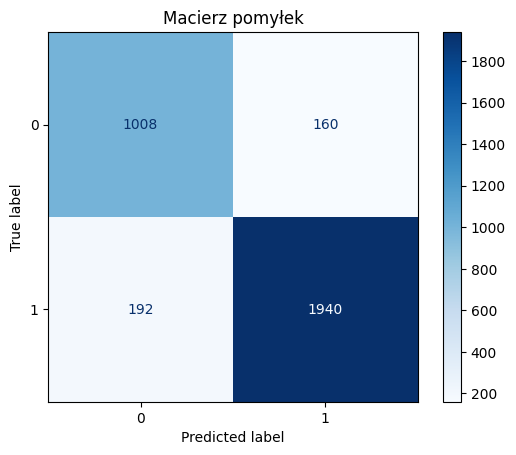

In [ ]:
# 3.6. Ocena modelu:
y_pred = model.predict(X_test)

# Ocena dokładności i raport klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Macierz pomyłek')
plt.show()

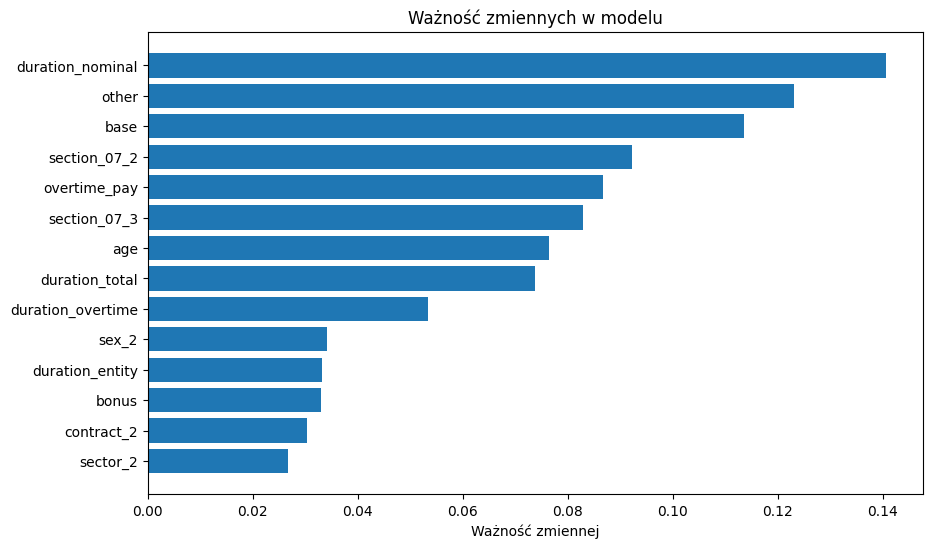

In [ ]:
# 3.7. Ocena ważności zmiennych:
# Wyciągamy ważność zmiennych z modelu Random Forest
importances = model.named_steps['classifier'].feature_importances_

# Zmienna "get_feature_names_out" działa po zastosowaniu preprocesora
# Jednak musimy rozdzielić zmienne kategoryczne i numeryczne, aby uzyskać pełną listę cech
cat_feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)
num_feature_names = numerical_columns  # Zmienne numeryczne nie zmieniają nazw po skalowaniu

# Łączymy nazwy cech
feature_names = list(cat_feature_names) + num_feature_names

# Tworzymy DataFrame, który zawiera nazwy cech i odpowiadające im ważności
features_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sortujemy po ważności malejąco
features_importance_df = features_importance_df.sort_values(by='importance', ascending=True)

# Wykres ważności zmiennych
plt.figure(figsize=(10, 6))
plt.barh(features_importance_df['feature'], features_importance_df['importance'])
plt.xlabel('Ważność zmiennej')
plt.title('Ważność zmiennych w modelu')
plt.show()

Odp.:
Względne znaczenie poszczególnych zmiennych w problemie klasyfikacji:

Z wykresu wynika, że największy wpływ na predykcję posiadania wyższego wykształcenia mają:

- duration_nominal – najwyższa ważność, czyli prawdopodobnie długość zatrudnienia w obecnej formie (np. na umowie nominalnej).

- other – może odnosić się do innych dodatków lub nieklasyfikowanego dochodu, ale to już trzeba byłoby się jakoś zagłębić co wpisywali tu ankietowani.

- base – podstawowa pensja ma również duży wpływ, to jest racjonalne, bo osoby z wyższym wykształceniem mogą częściej zarabiać więcej.

- duration_total i age – również dość istotne i realne, co może wskazywać, że starsi lub bardziej doświadczeni pracownicy częściej posiadają wyższe wykształcenie.

- overtime_pay – koreluje z typem pracy i wykształceniem.

Na końcu rankingu pojawiają się takie cechy jak:
- contract_2, sector_2, duration_overtime – co sugeruje, że ich wpływ na predykcję mojego modelu jest raczej marginalny.

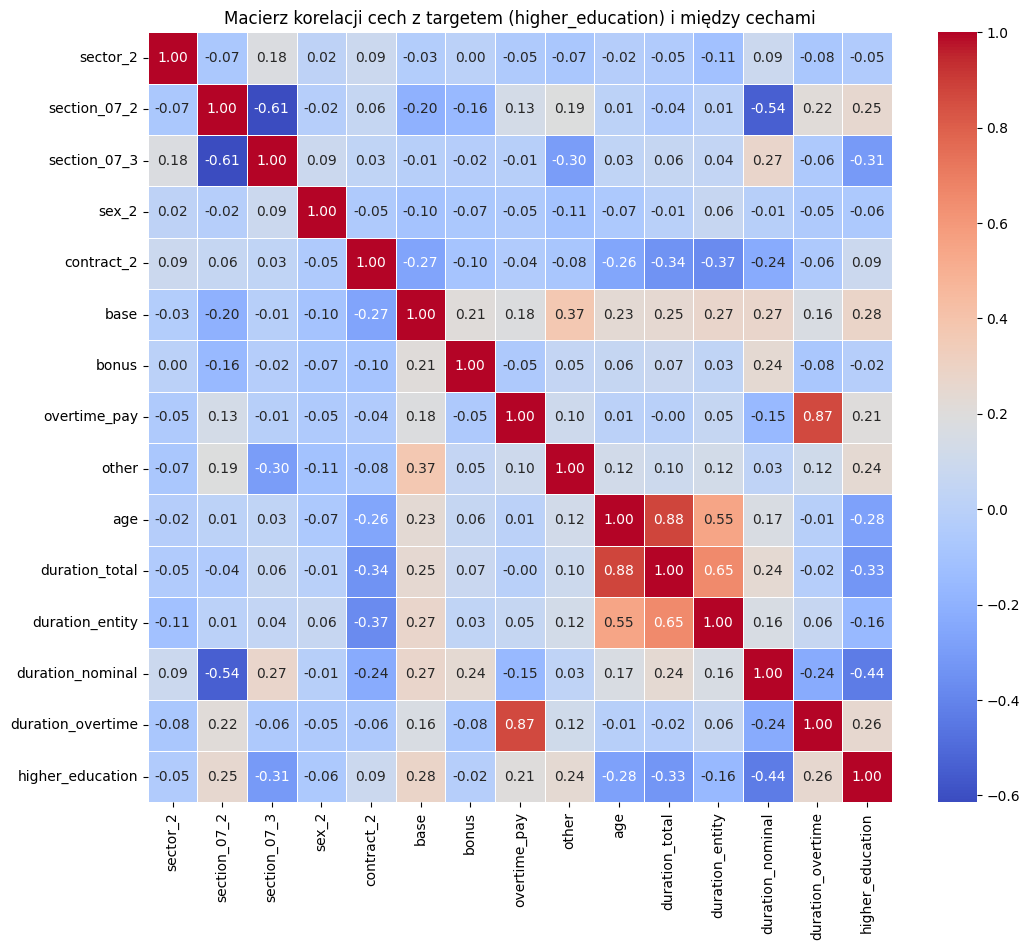

In [ ]:
# 3.8. Macierz korelacji:
# Przetwarzamy dane X przy użyciu preprocesora
X_processed = preprocessor.fit_transform(X)

# Tworzymy DataFrame z przetworzonymi danymi
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)  # Nadajemy nazwy kolumn po transformacji

# Łączymy dane wejściowe z targetem (higher_education)
X_processed_df['higher_education'] = y

# Obliczamy macierz korelacji dla wszystkich cech (w tym z targetem)
correlation_matrix = X_processed_df.corr()

# Rysujemy macierz korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz korelacji cech z targetem (higher_education) i między cechami')
plt.show()

Najsilniejsze korelacje z higher_education:

- duration_nominal: -0.44 – ujemna korelacja, czyli im dłuższa nominalna forma zatrudnienia, tym mniejsze prawdopodobieństwo posiadania wyższego wykształcenia.

- duration_total: -0.33

- age: -0.28

- base: 0.28

- other: 0.24

Obserwacje z tej macierzy korelacji dobrze współgrają z poprzednim wykresem ważności — cechy o wysokiej korelacji z targetem są też wysoko cenione przez model.

## Część 4

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 4.1. Przygotowanie danych:
df = df_backup.copy()
# Zmienna docelowa to teraz 'base', która reprezentuje wynagrodzenie podstawowe
y = df['base']

# Zmienna wejściowa (wszystkie kolumny oprócz 'base')
X = df.drop(columns=['base'])

print(X)
print(y)

# 4.2. Tworzymy preprocesor:
# OneHotEncoder dla zmiennych kategorycznych i StandardScaler dla zmiennych numerycznych
categorical_columns = ['sector', 'section_07', 'sex', 'contract', 'education']  # Wybór zmiennych kategorycznych
numerical_columns = ['bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']  # Wybór zmiennych ilościowych

# Tworzymy preprocesor, który stosuje odpowiednie transformacje do zmiennych kategorycznych i numerycznych
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Kodowanie zmiennych kategorycznych
        ('num', StandardScaler(), numerical_columns)  # Skalowanie zmiennych numerycznych
    ]
)

         bonus  overtime_pay    other  sector  section_07  sex  education  \
0         0.00          0.00     0.00       1           3    2          4   
1      1500.00          0.00  3414.32       1           2    1          1   
2         0.00          0.00  1700.41       1           2    2          4   
3         0.00          0.00  1305.00       1           2    2          5   
4         0.00       1893.35  3118.73       1           2    2          2   
...        ...           ...      ...     ...         ...  ...        ...   
10995  1323.65       1276.80  3337.32       1           2    2          2   
10996  5470.00          0.00  2385.13       1           1    2          4   
10997     0.00          0.00  9042.58       1           1    2          2   
10998  6950.00          0.00  4906.32       1           1    2          2   
10999   700.00        730.31  3296.65       1           2    2          2   

       contract  age  duration_total  duration_entity  duration_nominal  \


In [ ]:
# Pipeline z XGBoost regresorem
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror'))
])

# Przestrzeń parametrów dla Optuny
param_distributions = {
    'regressor__n_estimators': optuna.distributions.IntDistribution(50, 200),
    'regressor__max_depth': optuna.distributions.IntDistribution(3, 10),
    'regressor__learning_rate': optuna.distributions.FloatDistribution(0.01, 0.3, log=True),
    'regressor__subsample': optuna.distributions.FloatDistribution(0.6, 1.0),
    'regressor__colsample_bytree': optuna.distributions.FloatDistribution(0.6, 1.0)
}

# OptunaSearchCV z walidacją krzyżową (KFold)
optuna_search = OptunaSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='neg_mean_squared_error',
    n_trials=50,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Strojenie modelu na pełnych danych
optuna_search.fit(X, y)

# Wyniki strojenia
print("Najlepsze parametry (Optuna):", optuna_search.best_params_)
print("Najlepszy wynik cross-val (MSE):", -optuna_search.best_score_)

# Najlepszy model po Optunie
model = optuna_search.best_estimator_

# 4.5. Podział na dane treningowe i testowe:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenujemy model na danych treningowych
model.fit(X_train, y_train)

<ipython-input-63-0bea79e016dd>:17: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-05-01 14:09:51,922] A new study created in memory with name: no-name-6d592144-6fbd-4438-a293-a99ed4a9abb4
INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 11000 samples...
[I 2025-05-01 14:10:00,068] Trial 1 finished with value: -68418209.90022871 and parameters: {'regressor__n_estimators': 108, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.09531394128659046, 'regressor__subsample': 0.9927964971275649, 'regressor__colsample_bytree': 0.8493650227727735}. Best is trial 1 with value: -68418209.90022871.
[I 2025-05-01 14:10:00,225] Trial 0 finished with value: -77040949.47542986 and parameters: {'regressor__n_estimators': 133, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.023386487328209745, 'regressor__subsample': 0.9706543764362909, 'regresso

Najlepsze parametry (Optuna): {'regressor__n_estimators': 167, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.04509350425944461, 'regressor__subsample': 0.6409073247479923, 'regressor__colsample_bytree': 0.866311265990332}
Najlepszy wynik cross-val (MSE): 64701073.20846538


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'section_07',
                                                   'sex', 'contract',
                                                   'education']),
                                                 ('num', StandardScaler(),
                                                  ['bonus', 'overtime_pay',
                                                   'other', 'age',
                                                   'duration_total',
                                                   'duration_entity',
                                                   'duration_nominal',
                                                   'duration_overtime'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, c...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.04509350425944461, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=10,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=167,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

In [ ]:
# 4.6. Ocena modelu:
y_pred = model.predict(X_test)

# Ocena
cross_val_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f'Cross-validated Mean Squared Error (MSE): {-cross_val_mse.mean():.4f} ± {cross_val_mse.std():.4f}')
print(f'Cross-validated R-squared: {cross_val_r2.mean():.4f} ± {cross_val_r2.std():.4f}')

Cross-validated Mean Squared Error (MSE): 68399049.8164 ± 8385889.1066
Cross-validated R-squared: 0.8158 ± 0.0217


In [ ]:
# Przykładowe przewidywanie zarobków bazowych z wymyślonych danych:
sample_data = pd.DataFrame([{
    'sector': 1,
    'section_07': 1,
    'sex': 1,
    'contract': 1,
    'bonus': 1000,
    'overtime_pay': 0,
    'other': 2000,
    'age': 28,
    'education': 2,
    'duration_total': 10,
    'duration_entity': 7,
    'duration_nominal': 10,
    'duration_overtime': 0
}])

# Przewidujemy wartość 'base' dla przykładowych danych:
predicted_base = model.predict(sample_data)

print(f"Przewidywane wynagrodzenie podstawowe: {predicted_base[0]:.2f}")

Przewidywane wynagrodzenie podstawowe: 21992.54


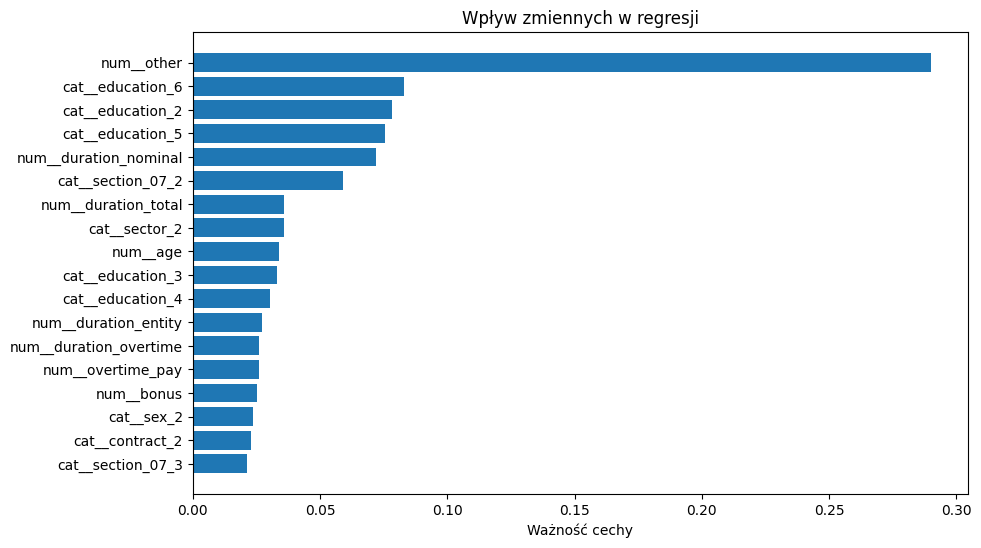

In [ ]:
# Wyciągamy feature names po OneHotEncoder
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Wyciągamy feature_importances_ z XGBoost
importances = model.named_steps['regressor'].feature_importances_

# Tworzymy DataFrame
features_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=True)

# Wykres ważności zmiennych
plt.figure(figsize=(10, 6))
plt.barh(features_importance_df['feature'], features_importance_df['importance'])
plt.xlabel('Ważność cechy')
plt.title('Wpływ zmiennych w regresji')
plt.show()

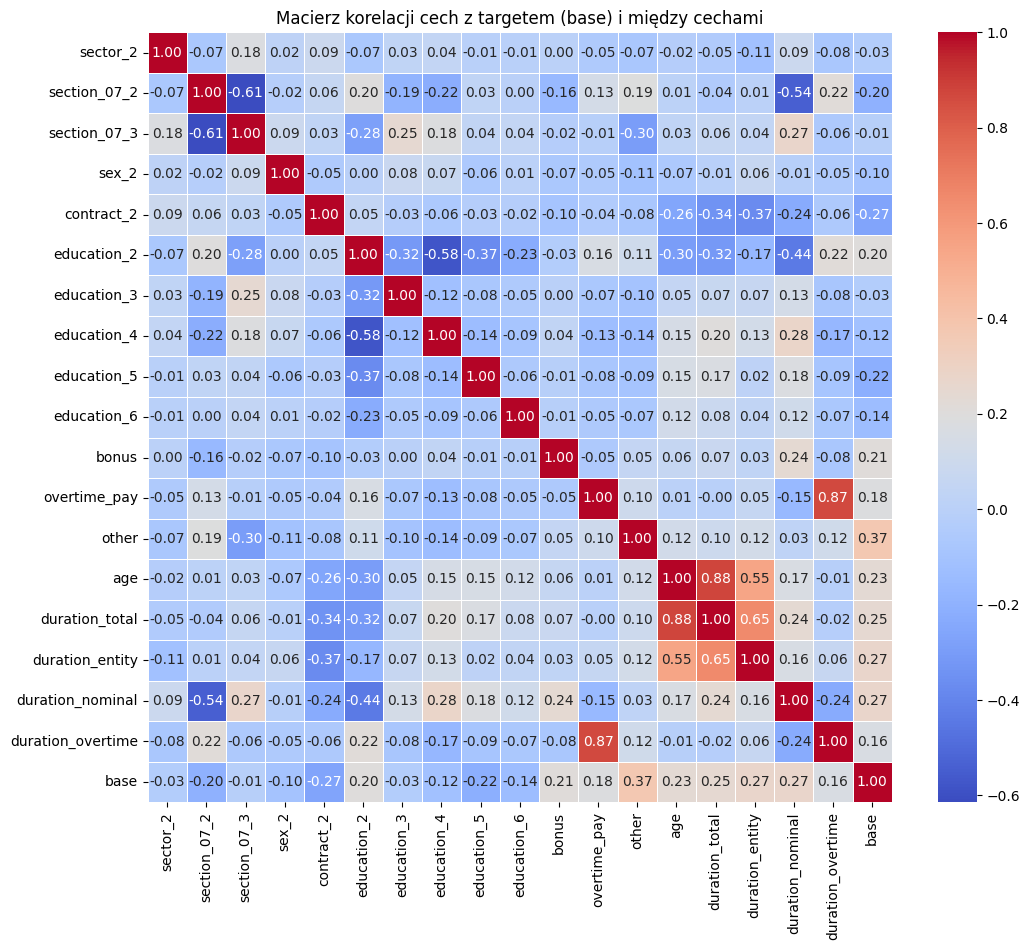

In [ ]:
# 4.8. Wnioskowanie przy budowie modelu, który nie używa niepotrzebnych zmiennych

# Przetwarzamy dane X przy użyciu preprocesora
X_processed = preprocessor.fit_transform(X)

cat_feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)
num_feature_names = numerical_columns  # Zmienne numeryczne nie zmieniają nazw po skalowaniu

# Łączymy nazwy cech
feature_names = list(cat_feature_names) + num_feature_names

# Tworzymy DataFrame z przetworzonymi danymi
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)  # Nadajemy nazwy kolumn po transformacji

# Łączymy dane wejściowe z targetem (base)
X_processed_df['base'] = y

# Obliczamy macierz korelacji dla wszystkich cech (w tym z targetem)
correlation_matrix = X_processed_df.corr()

# Rysujemy macierz korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz korelacji cech z targetem (base) i między cechami')
plt.show()

Zostawiłbym w moim modelu te zmienne:

- education

- duration_nominal

- other

- section_07

- contract

- i sex

### Regresja na wybranych cechach modelu (ale ponieważ XGBOOST, bardzo dobrze sobie radzi z szumem, więc raczej nie spodziewam się uzyskania lepszego wyniku)

In [ ]:
selected_features = ['education', 'duration_nominal', 'other', 'section_07', 'contract', 'sex']
X = df[selected_features]
y = df['base']  # target: wynagrodzenie podstawowe

# Podział zmiennych
categorical_columns = ['section_07', 'contract', 'sex']
numerical_columns = ['education', 'duration_nominal', 'other']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ]
)

# Pipeline z XGBoost regresorem
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror'))
])

# Przestrzeń parametrów dla Optuny
param_distributions = {
    'regressor__n_estimators': optuna.distributions.IntDistribution(50, 200),
    'regressor__max_depth': optuna.distributions.IntDistribution(3, 10),
    'regressor__learning_rate': optuna.distributions.FloatDistribution(0.01, 0.3, log=True),
    'regressor__subsample': optuna.distributions.FloatDistribution(0.6, 1.0),
    'regressor__colsample_bytree': optuna.distributions.FloatDistribution(0.6, 1.0)
}

# OptunaSearchCV z walidacją krzyżową (KFold)
optuna_search = OptunaSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='neg_mean_squared_error',
    n_trials=50,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Strojenie modelu na pełnych danych
optuna_search.fit(X, y)

# Wyniki strojenia
print("Najlepsze parametry (Optuna):", optuna_search.best_params_)
print("Najlepszy wynik cross-val (MSE):", -optuna_search.best_score_)

# Najlepszy model po Optunie
model = optuna_search.best_estimator_

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trening
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Ocena
cross_val_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f'Cross-validated Mean Squared Error (MSE): {-cross_val_mse.mean():.4f} ± {cross_val_mse.std():.4f}')
print(f'Cross-validated R-squared: {cross_val_r2.mean():.4f} ± {cross_val_r2.std():.4f}')

<ipython-input-68-efee7e923edf>:33: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-05-01 14:15:27,347] A new study created in memory with name: no-name-af5167f0-649f-4322-82d2-a35c117bb007
INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 11000 samples...
[I 2025-05-01 14:15:30,418] Trial 0 finished with value: -101127529.15835933 and parameters: {'regressor__n_estimators': 157, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.012211605790272336, 'regressor__subsample': 0.6817775350173632, 'regressor__colsample_bytree': 0.7971362348752515}. Best is trial 0 with value: -101127529.15835933.
[I 2025-05-01 14:15:31,391] Trial 1 finished with value: -88595584.66025166 and parameters: {'regressor__n_estimators': 138, 'regressor__max_depth': 9, 'regressor__learning_rate': 0.03143545694900009, 'regressor__subsample': 0.7308098185843996, 'regres

Najlepsze parametry (Optuna): {'regressor__n_estimators': 147, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.04487974333268227, 'regressor__subsample': 0.8991932302773525, 'regressor__colsample_bytree': 0.8151475641923979}
Najlepszy wynik cross-val (MSE): 85731068.02577403
Cross-validated Mean Squared Error (MSE): 82793677.9437 ± 9859611.2638
Cross-validated R-squared: 0.7775 ± 0.0205


Lepszy wynik został osiągnięty na modelu pierwszym operującym na pełnym zbiorze danych.

- Niższe MSE (średnio poprzedni model się mniej myli — błędy są mniejsze).

- Wyższe R² (poprzedni model wyjaśnia większą część wariancji danych, to znaczy że lepiej dopasowuje się do prawdziwych wartości).

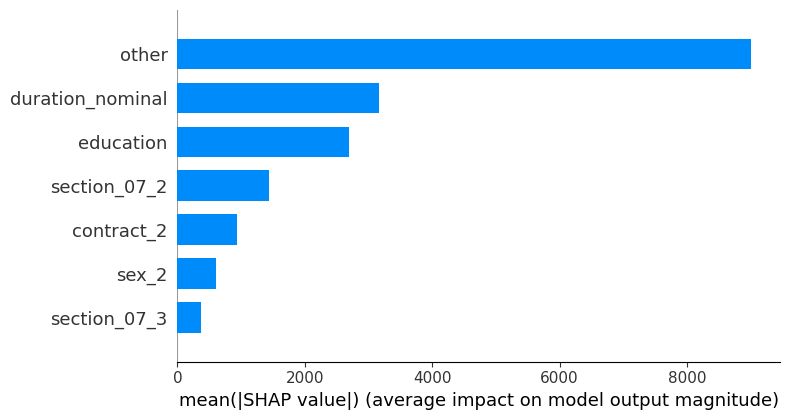

In [ ]:
# Używam shapa w celu zobaczenia, które cechy najbardziej wpływają na predykcje modelu.
import shap

X_processed = model.named_steps['preprocessor'].transform(X)

cat_feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)
num_feature_names = numerical_columns
feature_names = list(cat_feature_names) + list(num_feature_names)

explainer = shap.TreeExplainer(model.named_steps['regressor'])

shap_values = explainer.shap_values(X_processed)
shap.summary_plot(shap_values, features=X_processed, feature_names=feature_names, plot_type="bar")
